In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("NEP.csv")

In [3]:
df.head()

,college code,favours NEP,voted for ruling party,experience
0,C3439,Yes,Yes,10
1,C3483,No,No,9
2,C2753,Yes,Yes,9
3,C3242,Yes,Yes,3
4,C2402,No,No,5


In [4]:
df.shape

(577, 4)

### Check for missing values

In [5]:
df.isnull().sum()

college code              0
favours NEP               0
voted for ruling party    0
experience                0
dtype: int64

In [6]:
df['favours NEP'].value_counts()

No     307
Yes    270
Name: favours NEP, dtype: int64

In [7]:
df['voted for ruling party'].value_counts()

Yes    326
No     251
Name: voted for ruling party, dtype: int64

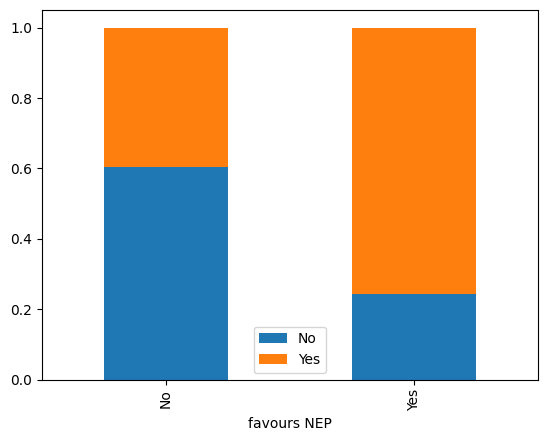

In [8]:
pd.crosstab(df["favours NEP"], df["voted for ruling party"], normalize='index').plot(kind="bar", stacked=True)
plt.legend()
plt.show()

### Step 1: Define null and alternative hypotheses

$H_0:$ Voting preference is independent of Opinion on NEP

$H_a:$ Voting preference is NOT independent of Opinion on NEP

### Step 2: Select the appropriate test

The formulated hypotheses can be tested using a Chi-square test of independence of attributes, concerning the two categorical variables, favours NEP (in favor of/against the policy) and voting preference (voted/did not vote for ruling party).

### Step 3: Decide the significance level

Here, we select α= 0.05.

### Step 4: Data preparation

To perform the Chi-squared of independence we need to create the contingency table. A contingency table is a tabular representation of categorical data. A contingency table shows the number of observations for combinations of values between the two categorical variables, say X and Y. Each cell in the contingency table represents a combination of X-Y values.

Pandas crosstab function is used to create a contingency table between two categorical variables from a dataframe

In [9]:
contingency_table = pd.crosstab(df["favours NEP"], df["voted for ruling party"])
contingency_table

voted for ruling party,No,Yes
favours NEP,,
No,185,122
Yes,66,204


### Step 5: Calculate the p-value

In [13]:
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', round(p_value,4))

The p-value is 0.0


### Step 6: Compare the p-value with $\alpha$

In [15]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {round(p_value,4)} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {round(p_value,4)} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0 is less than the level of significance, we reject the null hypothesis.


### Step 7: Conclusion

Since the p-value is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that voting preference is NOT independent of opinion on NEP